In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Will need to import Adj_a.csv file to complete the following analysis

file_path_a = "/Users/paulmulholland/Desktop/University/Complex_Systems/Project2/Code/Adj_enron.csv"
adj_a = pd.read_csv(file_path_a,delimiter=",",header=None)

file_path_b = "/Users/paulmulholland/Desktop/University/Complex_Systems/Project2/Code/Adj_git.csv"
adj_b = pd.read_csv(file_path_b,delimiter=",",header=None)

#s shows number of edges connected to each author - degree 

s_a = adj_a.sum(axis = 0, skipna = True)

s_b = adj_b.sum(axis = 0, skipna = True)



#Gives probability for an author to have degree k -> k = [1,81]

unique_elements_a, counts_elements_a = np.unique(s_a, return_counts=True)

unique_elements_b, counts_elements_b = np.unique(s_b, return_counts=True)


#Function calculates: Average Local CC
#Input info: x = adj_a (original dataframe matrix)

def CC(x):
    
    adj_mat = np.asarray(x)     #converts dataframe matrix to numpy matrix array


    tot_cc = 0
    k=np.sum(adj_mat,axis=0)

    for i in range(0,len(adj_mat)):

        p = []
        for u in range(0,len(adj_mat)):
            if adj_mat[i,u] == 1:
                p.append(u)
            else:
                p = p            #p -> gives list of connected neighbours of a node

        L = 0
        for q in range (0, len(p)):
            for h in range (0,len(p)):
                if adj_mat[p[q], p[h]] == 1:
                    L = L + 1
                else:
                    L = L        #L -> gives 2x number of triangles connected to given node (double counting)
            
        if k[i]<=1:
            cc=0
        else:
            cc = L/(k[i]*(k[i]-1))
        tot_cc = (tot_cc + cc)

    
    print("Average CC is: ", tot_cc/len(adj_mat))

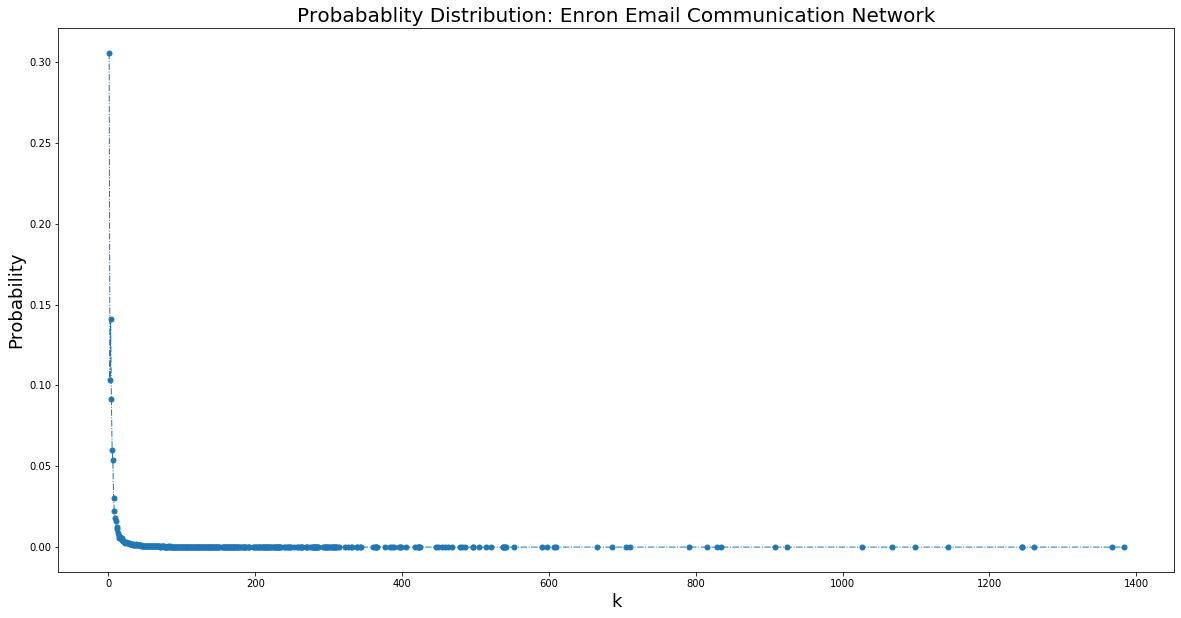

In [3]:
plt.figure(figsize=(20,10))
plt.title("Probabablity Distribution: Enron Email Communication Network",fontsize=20)
plt.plot(unique_elements_a, counts_elements_a/(sum(counts_elements_a)), linewidth = 1, marker = "o", markersize = 5,ls="-.")
plt.xlabel("k", fontsize = 18)
plt.ylabel("Probability", fontsize = 18)

plt.savefig('enron_prob_dist.png')

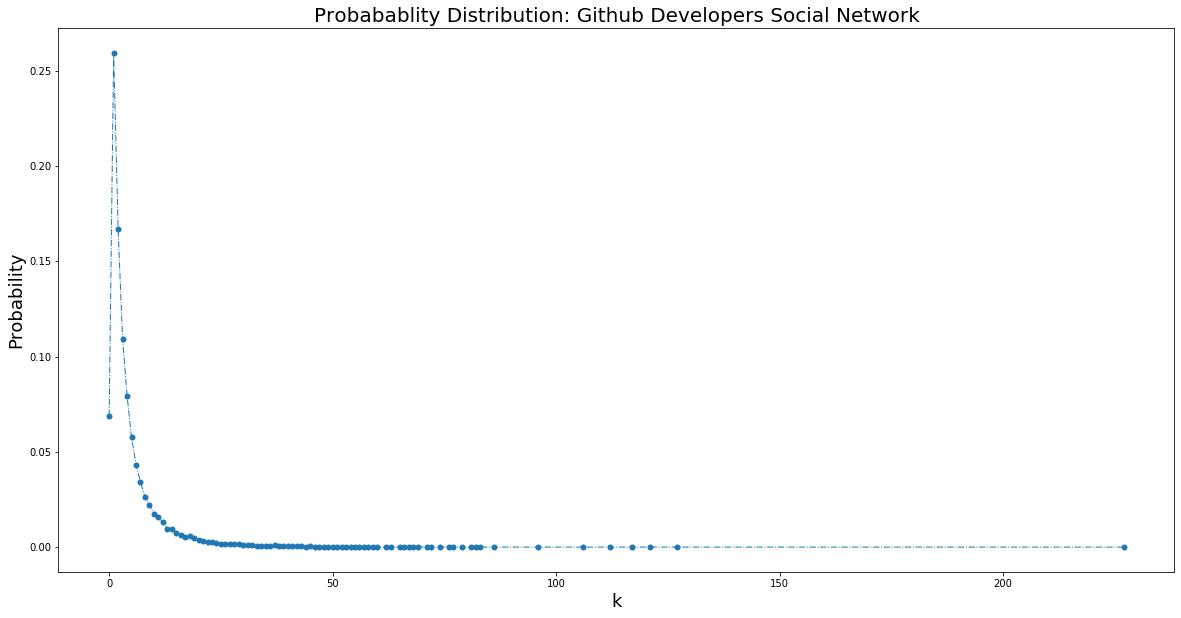

In [4]:
plt.figure(figsize=(20,10))
plt.title("Probabablity Distribution: Github Developers Social Network",fontsize=20)
plt.plot(unique_elements_b, counts_elements_b/(sum(counts_elements_b)), linewidth = 1, marker = "o", markersize = 5,ls="-.")
plt.xlabel("k", fontsize = 18)
plt.ylabel("Probability", fontsize = 18)

plt.savefig('git_prob_dist.png')

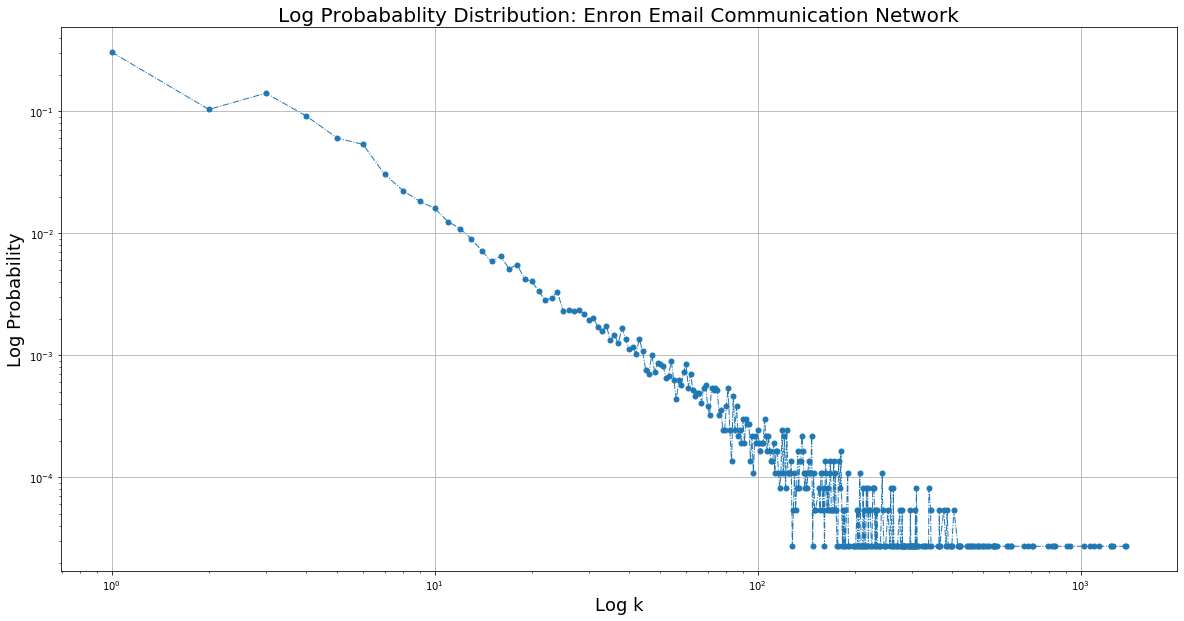

In [15]:
plt.figure(figsize=(20,10))
plt.title("Log Probabablity Distribution: Enron Email Communication Network",fontsize=20)
plt.plot(unique_elements_a, counts_elements_a/(sum(counts_elements_a)), linewidth = 1, marker = "o", markersize = 5,ls="-.")
plt.xlabel("Log k", fontsize = 18)
plt.ylabel("Log Probability", fontsize = 18)

#Comment out the following 3 lines to obtain "non-log" graph, i.e. "Probability vs. k" graph

plt.semilogx()
plt.semilogy()
plt.grid()

plt.show()

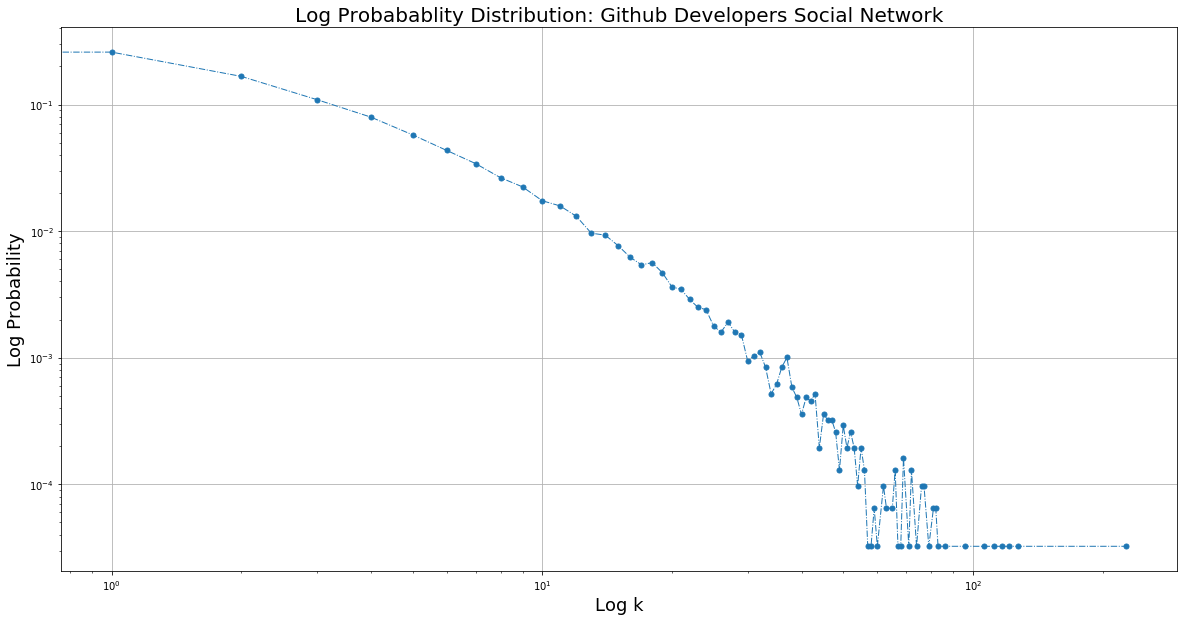

In [16]:
plt.figure(figsize=(20,10))
plt.title("Log Probabablity Distribution: Github Developers Social Network",fontsize=20)
plt.plot(unique_elements_b, counts_elements_b/(sum(counts_elements_b)), linewidth = 1, marker = "o", markersize = 5,ls="-.")
plt.xlabel("Log k", fontsize = 18)
plt.ylabel("Log Probability", fontsize = 18)


#Comment out the following 3 lines to obtain "non-log" graph, i.e. "Probability vs. k" graph

plt.semilogx()
plt.semilogy()
plt.grid()

plt.show()

In [7]:
#NetworkX Clustering Coefficient test

import networkx as nx

G_a = nx.from_pandas_adjacency(adj_a)
G_b = nx.from_pandas_adjacency(adj_b)


print(nx.average_clustering(G_a))
print(nx.average_clustering(G_b))

0.4969825595995024
0.06073077949074306


In [8]:
CC(adj_a)

Average CC is:  0.4969825595995024


In [9]:
CC(adj_b)

Average CC is:  0.09536585944142117
